## Hacer pruebas:

In [1]:
from skimage.measure import find_contours
import matplotlib.pyplot as plt
import numpy as np
from torchviz import make_dot
import torch
import cv2
from unet import UNet

In [2]:
# Mi libreria:
%load_ext autoreload
%autoreload 2
from processLIDC3 import Patient

In [3]:
# metodos = [m for m in dir(patient) if not '__' in m]
# print(metodos) 

In [4]:
# patient = Patient("LIDC-IDRI-0170")
# patient = Patient("LIDC-IDRI-0186")
patient = Patient("LIDC-IDRI-0002")
patient.get_all_nodules()
patient.scale()

Paciente: LIDC-IDRI-0002
___________________________________
Paciente del nodulo: LIDC-IDRI-0002
Primera slice con el nodulo 171
num. slices nodulo: 28
-----------
Paciente del nodulo: LIDC-IDRI-0002
Primera slice con el nodulo 176
num. slices nodulo: 23
-----------
___________________________________


In [5]:
# patient.plot_mask()

In [6]:
# patient.reconstruct_body(nodulos = True)

## Inferencia:

In [7]:
# # Mi libreria:
# %load_ext autoreload
# %autoreload 2
# from processLIDC3 import Patient
# import torch

In [8]:

model_entrenado = torch.hub.load('milesial/Pytorch-UNet', 'unet_carvana', pretrained=True, scale=0.5)
model = UNet(n_channels=3, n_classes=2)  # , init_features=32) # , dropout_rate=0.2)
model.to('cuda')  # # Si fue entrenado en grafica hay que abrirlo con tal 
model.eval()

Using cache found in /home/faraujo/.cache/torch/hub/milesial_Pytorch-UNet_master


UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
 

obteniendo los datos...


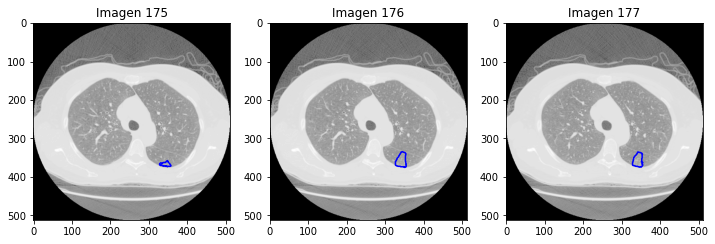

In [9]:
# Mostrar imagenes:
patient.imshow(slices=(175,176,177), scaled=True)

obteniendo los datos...
realizando inferencia...
(2, 2, 512, 512)


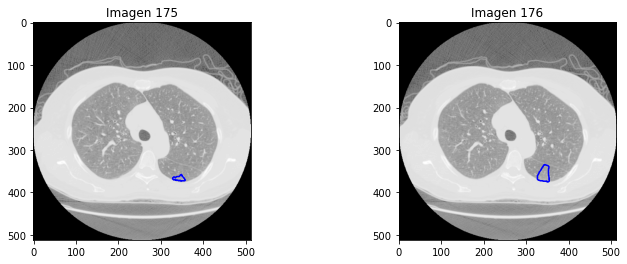

In [13]:
# patient = Patient("LIDC-IDRI-0002")
# patient.scale()
patient.imshow(slices=(175,176),
               scaled=True, 
               label=True, 
               model=model,
               threshold = 0.00001,
               path2save=None,
               gpu = True)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
yolo segment train data=/home/abel/yolo-dataset-10pcent_background/train.yaml model=yolov8l-seg.pt epochs=150 imgsz=512 optimizer='Adamax'


SyntaxError: invalid syntax (842469785.py, line 1)

In [ ]:
yolo val data=/home/abel/yolo-dataset-include02/train.yaml model=/home/abel/yolo-dataset-include02/runs/segment_en_path_erroneo/train2/weights/best.pt conf=0.000001
